In [43]:
import time

In [44]:
import requests as req
from bs4 import BeautifulSoup

In [45]:
import pandas as pd
import numpy as np

In [66]:
partys = {
"더불어민주당":"https://vote2020.imbc.com/Api/WinnerSetJD?jdcode=1&isBire=0&callback=WinnerSetJD_1_0_202004160130",
"미래통합당":"https://vote2020.imbc.com/Api/WinnerSetJD?jdcode=2&isBire=0&callback=WinnerSetJD_2_0_202004160130",
"정의당":"https://vote2020.imbc.com/Api/WinnerSetJD?jdcode=6&isBire=0&callback=WinnerSetJD_6_0_202004160130",
"무소속":"https://vote2020.imbc.com/Api/WinnerSetJD?jdcode=99&isBire=0&callback=WinnerSetJD_99_0_202004160130",
}

In [67]:
df = pd.DataFrame()
for party in list(partys.keys()):
    html = req.get(partys[party]).text
    html = html.replace(party.split("=")[-1],'').replace('")',"").replace('("',"")
    soup = BeautifulSoup(html, 'html.parser')

    names = [name.text for name in soup.find_all("p")]
    locations= [location.text for location in soup.find_all("span") if location.text]

    sido = []
    sigungu = []
    for n, location in enumerate(locations):
        if n % 2 == 0:
            sido.append(location)
        else:
            sigungu.append(location)
    
    rows = [ [r1, r2, r3] for r1, r2, r3 in zip(names, sido, sigungu)]
    temp = pd.DataFrame(rows, columns=['당선자명', '시도명', '선거구명'])
    temp['소속정당'] = party
    
    df = pd.concat([df, temp])
df

,당선자명,시도명,선거구명,소속정당
0,이낙연,서울,종로구,더불어민주당
1,홍익표,서울,중구성동구갑,더불어민주당
2,박성준,서울,중구성동구을,더불어민주당
3,전혜숙,서울,광진구갑,더불어민주당
4,고민정,서울,광진구을,더불어민주당
...,...,...,...,...
0,홍준표,대구,수성구을,무소속
1,윤상현,인천,동구미추홀구을,무소속
2,권성동,강원,강릉시,무소속
3,이용호,전북,남원시임실군순창군,무소속


In [68]:
df['선거구명 전체'] = df['시도명'] + ' ' + df['선거구명']

In [69]:
import platform

import matplotlib.pyplot as plt

from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')    

plt.rcParams['axes.unicode_minus'] = False

In [70]:
BORDER_LINES = [
    [[1, 1, 5, 5, 1], [18, 20, 20, 18, 18]],# 광주광역시
    [[1, 2, 2, 5, 5, 1, 1, 3, 3, 0, 0, 1, 1], [22, 22, 21, 21, 20, 20, 18, 18, 17, 17, 20, 20, 22]],# 전라남도
    [[14, 14, 15, 15, 16, 16, 16, 14], [20, 22, 22, 21, 21, 21, 20, 20]],# 제주도
    [[2, 2, 1, 1, 3, 3, 5, 5, 4, 4, 2], [14, 16, 16, 17, 17, 18, 18, 16, 16, 14, 14]],# 전라북도
    [ [4, 4, 6, 6, 7, 7, 6, 6, 4], [14, 16, 16, 15, 15, 12, 12, 14, 14]],# 대전광역시
    [[4, 4, 6, 6], [14, 13, 13, 14]],# 세종특별시
    [[2, 1, 1, 2, 2, 3, 3, 5, 5, 6, 6], [14, 14, 13, 13, 12, 12, 10, 10, 12, 12, 13]],# 충청남도
    [[2, 1, 1, 0, 0, 2, 2, 3, 3, 4, 4] , [12, 12, 10, 10, 7, 7, 8, 8, 9, 9, 10]], # 인천광역시
    [[9, 9, 6, 6, 5, 4, 4, 2, 2, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 12, 12, 14, 14, 13, 13],
    [1, 0, 0, 1, 1, 1, 2, 2, 3, 3, 4, 4, 8, 8, 9, 9, 10, 10, 12, 12, 12, 10, 10, 9, 9, 3]], # 경기도
    [[13, 9, 9, 12, 12, 11, 11, 8, 8, 5, 5, 3, 3, 4, 4, 6, 6, 7, 7, 9],
     [3, 3, 4, 4, 7, 7, 8, 8, 9, 9, 8, 8, 6, 6, 3, 3, 2, 2, 1, 1]], # 경기도
    [[9, 10, 10, 11, 11, 13, 13, 12, 12, 9],
     [1, 1, 2, 2, 3, 3, 1, 1, 0, 0]], # 강원도
    [[5, 6, 6, 7, 7, 8, 8, 9, 9, 7, 7],
     [21, 21, 22, 22, 19, 19, 17, 17, 16, 16, 15]], # 경상남도
    [[7, 9, 9, 12, 12, 13, 13, 14, 14, 12, 12, 10, 10, 9],
     [20, 20, 19, 19, 18, 18, 17, 17, 16, 16, 15, 15, 16, 16]], # 부산광역시
    [[7, 9, 9, 10, 10, 12, 12], [13, 13, 14, 14, 13, 13, 15]], # 대구광역시
    [[12, 13, 13, 15, 15, 14, 14], [14, 14, 13, 13, 14, 14, 16]], # 울산광역시
    [[12, 12, 13, 13, 14, 14, 13, 13, 14, 14, 15, 15, 16, 16, 15, 15],
     [13, 12, 12, 10, 10, 9, 9, 6, 6, 9, 9, 11, 11, 12, 12, 13]], # 경상북도
]

In [71]:
election_map = pd.read_excel('../data/korea_map_21th_election_type_b_displayname.xlsx')
election_map = election_map[['X','Y','선거구명 전체', '시도명', '표기이름']].sort_values('선거구명 전체')
election_map

,X,Y,선거구명 전체,시도명,표기이름
216,12,1,강원 강릉시,강원,강릉시
217,12,2,강원 동해시태백시삼척시정선군,강원,동해 태백\n삼척 정선
197,11,0,강원 속초시인제군고성군양양군,강원,속초 인제\n고성 양양
179,10,1,강원 원주시갑,강원,원주 갑
199,11,2,강원 원주시을,강원,원주 을
...,...,...,...,...,...
190,10,12,충북 청주시상당구,충북,청주 상당
151,8,12,충북 청주시서원구,충북,청주 서원
131,7,12,충북 청주시청원구,충북,청주 청원
171,9,12,충북 청주시흥덕구,충북,청주 흥덕


In [72]:
# 데이터 병합
df_election = pd.merge(election_map, df, how='outer')
df_election.head()

,X,Y,선거구명 전체,시도명,표기이름,당선자명,선거구명,소속정당
0,12,1,강원 강릉시,강원,강릉시,권성동,강릉시,무소속
1,12,2,강원 동해시태백시삼척시정선군,강원,동해 태백\n삼척 정선,이철규,동해시태백시삼척시정선군,미래통합당
2,11,0,강원 속초시인제군고성군양양군,강원,속초 인제\n고성 양양,이양수,속초시인제군고성군양양군,미래통합당
3,10,1,강원 원주시갑,강원,원주 갑,이광재,원주시갑,더불어민주당
4,11,2,강원 원주시을,강원,원주 을,송기헌,원주시을,더불어민주당


In [73]:
df_election.loc[df_election['소속정당'].isna(), '소속정당'] = '경선중'
df_election

,X,Y,선거구명 전체,시도명,표기이름,당선자명,선거구명,소속정당
0,12,1,강원 강릉시,강원,강릉시,권성동,강릉시,무소속
1,12,2,강원 동해시태백시삼척시정선군,강원,동해 태백\n삼척 정선,이철규,동해시태백시삼척시정선군,미래통합당
2,11,0,강원 속초시인제군고성군양양군,강원,속초 인제\n고성 양양,이양수,속초시인제군고성군양양군,미래통합당
3,10,1,강원 원주시갑,강원,원주 갑,이광재,원주시갑,더불어민주당
4,11,2,강원 원주시을,강원,원주 을,송기헌,원주시을,더불어민주당
...,...,...,...,...,...,...,...,...
248,10,12,충북 청주시상당구,충북,청주 상당,정정순,청주시상당구,더불어민주당
249,8,12,충북 청주시서원구,충북,청주 서원,이장섭,청주시서원구,더불어민주당
250,7,12,충북 청주시청원구,충북,청주 청원,변재일,청주시청원구,더불어민주당
251,9,12,충북 청주시흥덕구,충북,청주 흥덕,도종환,청주시흥덕구,더불어민주당


In [74]:
df_election.groupby(['시도명', '소속정당'])['소속정당'].agg(['count'])

count
시도명 소속정당         
강원  더불어민주당      3
    무소속         1
    미래통합당       4
경기  더불어민주당     51
    미래통합당       7
    정의당         1
경남  더불어민주당      3
    무소속         1
    미래통합당      12
경북  미래통합당      13
광주  더불어민주당      8
대구  무소속         1
    미래통합당      11
대전  더불어민주당      7
부산  더불어민주당      3
    미래통합당      15
서울  더불어민주당     41
    미래통합당       8
세종  더불어민주당      2
울산  더불어민주당      1
    미래통합당       5
인천  더불어민주당     11
    무소속         1
    미래통합당       1
전남  더불어민주당     10
전북  더불어민주당      9
    무소속         1
제주  더불어민주당      3
충남  더불어민주당      6
    미래통합당       5
충북  더불어민주당      5
    미래통합당       3

In [75]:
df_election['소속정당'].value_counts()

더불어민주당    163
미래통합당      84
무소속         5
정의당         1
Name: 소속정당, dtype: int64

In [77]:
# 데이터 시각화를 위한 지도 생성

final = df_election.pivot_table(index='Y', columns='X', values='SUCCESSFUL', aggfunc='first')
final

X,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
Y,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,1.0,2.0,1.0,1.0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,0.0,NaN,NaN,NaN
2,NaN,NaN,2.0,2.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,NaN,NaN,NaN
3,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,NaN,NaN,NaN
4,NaN,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN
5,NaN,NaN,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,NaN,NaN,NaN
6,NaN,NaN,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,NaN,NaN
7,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,NaN,NaN
8,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,NaN,NaN


In [78]:
# 색상 부여
from matplotlib.colors import LinearSegmentedColormap

color = {
    '무소속':'#869ba5',
    '미래통합당':'#ef426f',
    '더불어민주당':'#1a4fa2',
    '정의당':'#facc03',
}
cm = LinearSegmentedColormap.from_list('election', list(color.values()), N=4)

In [79]:
df_election['소속정당'].unique()

array(['무소속', '미래통합당', '더불어민주당', '정의당'], dtype=object)

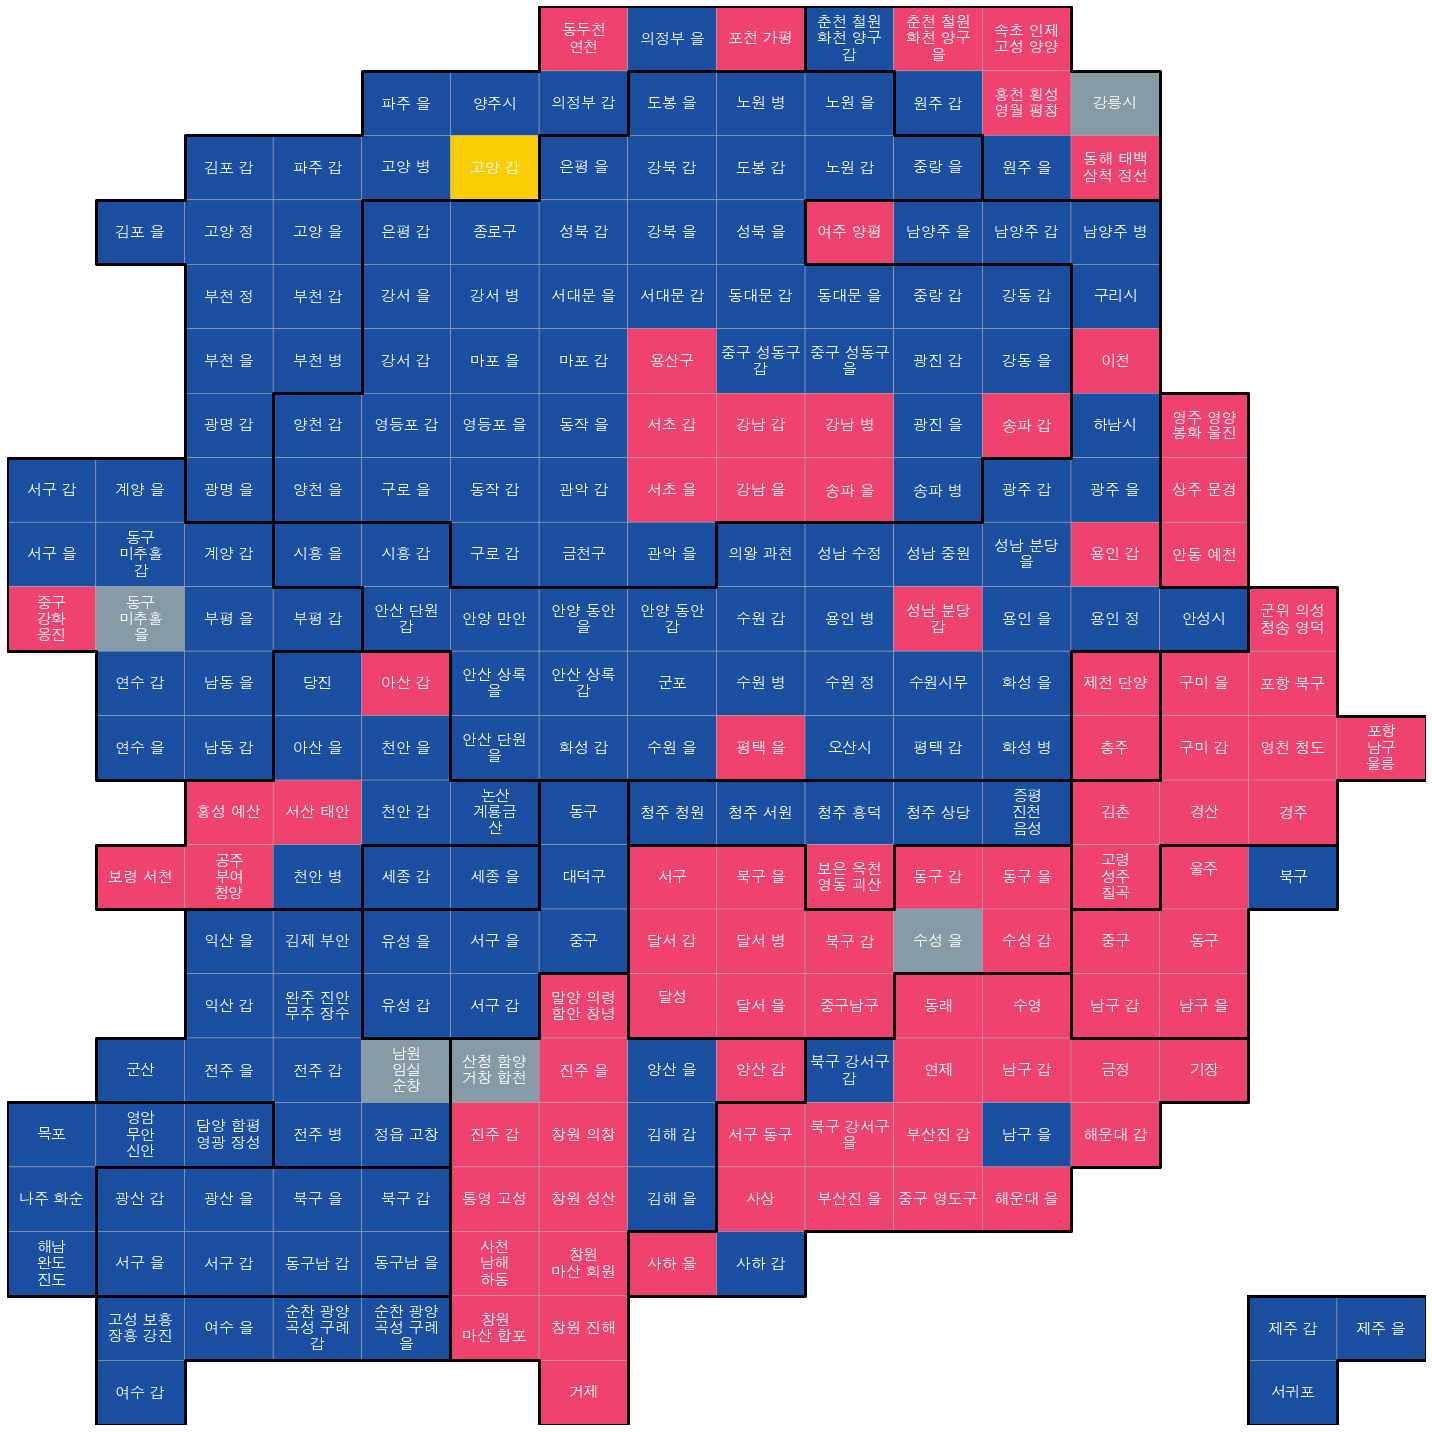

In [80]:
plt.figure(figsize=(20, 20))

plt.pcolor(final, cmap=cm, edgecolor='#aaaaaa', linewidth=0.5)

for idx, row in df_election.iterrows():
    name = row['표기이름']
    plt.annotate(name, (row['X']+0.5, row['Y']+0.5), weight='bold',
                 fontsize=15, ha='center', va='center', color='white')

for path in BORDER_LINES:
    x, y = path
    plt.plot(x, y, c='black', lw=3)
    
plt.gca().invert_yaxis()

plt.axis('off')
plt.tight_layout()
plt.savefig('../당선결과.png')
plt.show()

In [81]:
df_election.to_excel('../data/korea_map_21th_election_type_b_result.xlsx', index=False)

In [96]:
import json

In [179]:
partys = {
"미래한국당":"https://vote2020.imbc.com/Api/WinnerJDData?callback=WinnerJDData_4_202004161427&jdcode=4",
"더불어시민당":"https://vote2020.imbc.com/Api/WinnerJDData?callback=WinnerJDData_5_202004161427&jdcode=5",
"정의당":"https://vote2020.imbc.com/Api/WinnerJDData?callback=WinnerJDData_6_202004161428&jdcode=6",
"국민의당":"https://vote2020.imbc.com/Api/WinnerJDData?callback=WinnerJDData_10_202004161428&jdcode=10",
"열린민주당":"https://vote2020.imbc.com/Api/WinnerJDData?callback=WinnerJDData_12_202004161428&jdcode=12",
}

In [180]:
rows=[]
for party in list(partys.keys()):
    html = req.get(partys[party]).text

    html = html.replace(partys[party].split("callback=")[-1].split('&')[0],'').replace(')',"").replace('(',"")
    
    res = json.loads(html)
    
    for bire in res['BireList']:
        rows.append([bire['JDNAME'], bire['HBNAME'], '비례대표'])

In [186]:
bire = pd.DataFrame(rows, columns=["소속정당","당선자명", "표기이름"])
bire.to_excel('../data/korea_map_21th_election_type_b_bire_result.xlsx', index=False)

In [187]:
bire.groupby('소속정당')[['당선자명']].count().sort_values('당선자명', ascending=False)

,당선자명
소속정당,
한국당,19
시민당,17
정의당,5
국민의당,3
열린민주,3


In [188]:
district = df_election[['소속정당','당선자명','표기이름']]

In [189]:
National_Assembly_21th = pd.concat([district, bire]).reset_index(drop=True)

In [190]:
National_Assembly_21th

,소속정당,당선자명,표기이름
0,무소속,권성동,강릉시
1,미래통합당,이철규,동해 태백\n삼척 정선
2,미래통합당,이양수,속초 인제\n고성 양양
3,더불어민주당,이광재,원주 갑
4,더불어민주당,송기헌,원주 을
...,...,...,...
295,국민의당,이태규,비례대표
296,국민의당,권은희,비례대표
297,열린민주,김진애,비례대표
298,열린민주,최강욱,비례대표


In [259]:
bire_party = {
    '한국당':'미래한국당',
    '시민당':'더불어시민당',
    '열린민주':'열린민주당'
}

for party in list(bire_party.keys()):
    National_Assembly_21th.loc[National_Assembly_21th['소속정당'] == party, '소속정당'] = bire_party[party]

In [192]:
National_Assembly_21th.groupby('소속정당')[['당선자명']].count().sort_values('당선자명', ascending=False)

,당선자명
소속정당,
더불어민주당,163
미래통합당,84
미래한국당,19
더불어시민당,17
정의당,6
무소속,5
국민의당,3
열린민주당,3


In [193]:
party_size = National_Assembly_21th.groupby('소속정당')[['당선자명']].count().sort_values('당선자명', ascending=False).reset_index()
party_size

,소속정당,당선자명
0,더불어민주당,163
1,미래통합당,84
2,미래한국당,19
3,더불어시민당,17
4,정의당,6
5,무소속,5
6,국민의당,3
7,열린민주당,3


In [346]:
# 당선자수 순서대로 정렬
for order, party in enumerate(party_size['소속정당'].unique()):
    National_Assembly_21th.loc[National_Assembly_21th['소속정당'] == party, 'order'] = order
National_Assembly_21th = National_Assembly_21th.sort_values(['order','표기이름']).reset_index(drop=True)

X = []
Y = []

for x in range(20):
    for y in range(15):
        X.append(x)
        Y.append(y)
        
National_Assembly_21th['X'] = X
National_Assembly_21th['Y'] = Y
National_Assembly_21th['표시이름'] = National_Assembly_21th['표기이름'] + '\n' +  National_Assembly_21th['당선자명']
National_Assembly_21th.head()

,소속정당,당선자명,표기이름,order,X,Y,표시이름,성향
0,더불어민주당,진선미,강동 갑,0.0,0,0,강동 갑\n진선미,진보
1,더불어민주당,이해식,강동 을,0.0,0,1,강동 을\n이해식,진보
2,더불어민주당,천준호,강북 갑,0.0,0,2,강북 갑\n천준호,진보
3,더불어민주당,박용진,강북 을,0.0,0,3,강북 을\n박용진,진보
4,더불어민주당,강선우,강서 갑,0.0,0,4,강서 갑\n강선우,진보


In [354]:
from matplotlib.colors import LinearSegmentedColormap

color_order_size = {
    '더불어민주당':'#1a4fa2',
    '미래통합당':'#ef426f',
    '미래한국당':'#ef426f',
    '더불어시민당':'#1a4fa2',
    '정의당':'#facc03',
    '무소속':'#869ba5',
    '국민의당':'#EA5504',
    '열린민주당':'#003E98',
}
cm_order_size = LinearSegmentedColormap.from_list('election', list(color_order_size.values()), N=8)

In [355]:
National_Assembly_21th_MAP = National_Assembly_21th.pivot_table(index='Y', columns='X', values='order')
National_Assembly_21th_MAP

X,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Y,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,4.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,4.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,4.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,4.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,5.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,5.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,5.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,5.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,5.0


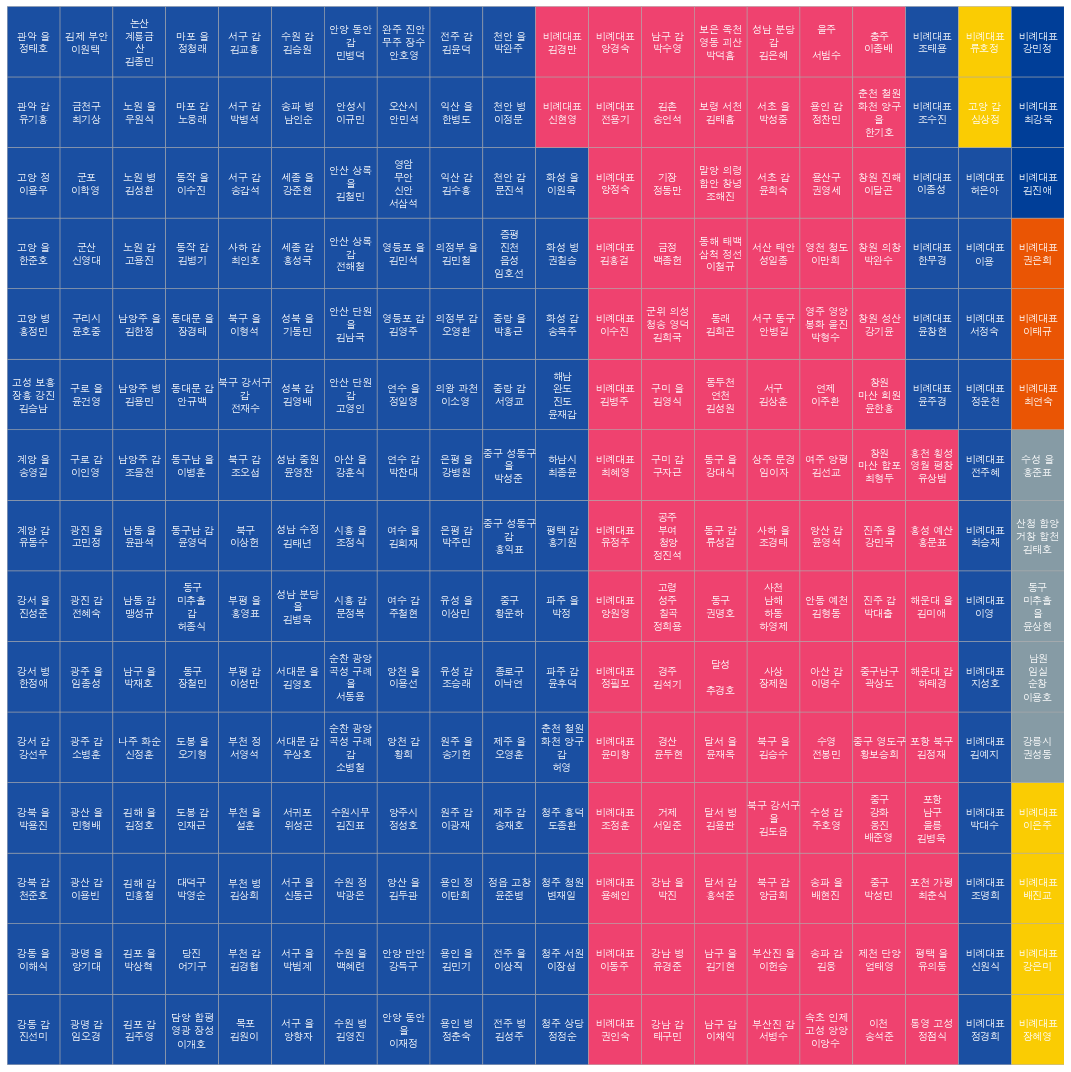

In [356]:
plt.figure(figsize=(15, 15))

plt.pcolor(National_Assembly_21th_MAP, cmap=cm_order_size, edgecolor='#aaaaaa', linewidth=0.5)

for idx, row in National_Assembly_21th.iterrows():
    name = row['표시이름']
    plt.annotate(name, (row['X']+0.5, row['Y']+0.5), weight='bold',
                 fontsize=10, ha='center', va='center', color='white')
plt.axis('off')
plt.tight_layout()
plt.savefig('../21대 국회 의원(당선자수).png')
plt.show()

In [358]:
# 정당별 (지역구 + 비례) 순서대로 정렬
color_order_party = {
    '더불어민주당':'#1a4fa2',
    '더불어시민당':'#1a4fa2',
    '미래통합당':'#ef426f',
    '미래한국당':'#ef426f',
    '정의당':'#facc03',
    '무소속':'#869ba5',
    '국민의당':'#EA5504',
    '열린민주당':'#003E98',
}

cm_order_party = LinearSegmentedColormap.from_list('election', list(color_order_party.values()), N=8)

order = {
    '더불어민주당':0,
    '더불어시민당':1,
    '미래통합당':2,
    '미래한국당':3,
    '정의당':4,
    '무소속':5,
    '국민의당':6,
    '열린민주당':7
}

for party in list(order.keys()):
    National_Assembly_21th.loc[National_Assembly_21th['소속정당'] == party, 'order'] = order[party]
National_Assembly_21th = National_Assembly_21th.sort_values(['order','표기이름']).reset_index(drop=True)

X = []
Y = []

for x in range(20):
    for y in range(15):
        X.append(x)
        Y.append(y)
        
National_Assembly_21th['X'] = X
National_Assembly_21th['Y'] = Y
National_Assembly_21th['표시이름'] = National_Assembly_21th['표기이름'] + '\n' +  National_Assembly_21th['당선자명']
National_Assembly_21th.head()

,소속정당,당선자명,표기이름,order,X,Y,표시이름,성향
0,더불어민주당,진선미,강동 갑,0.0,0,0,강동 갑\n진선미,진보
1,더불어민주당,이해식,강동 을,0.0,0,1,강동 을\n이해식,진보
2,더불어민주당,천준호,강북 갑,0.0,0,2,강북 갑\n천준호,진보
3,더불어민주당,박용진,강북 을,0.0,0,3,강북 을\n박용진,진보
4,더불어민주당,강선우,강서 갑,0.0,0,4,강서 갑\n강선우,진보


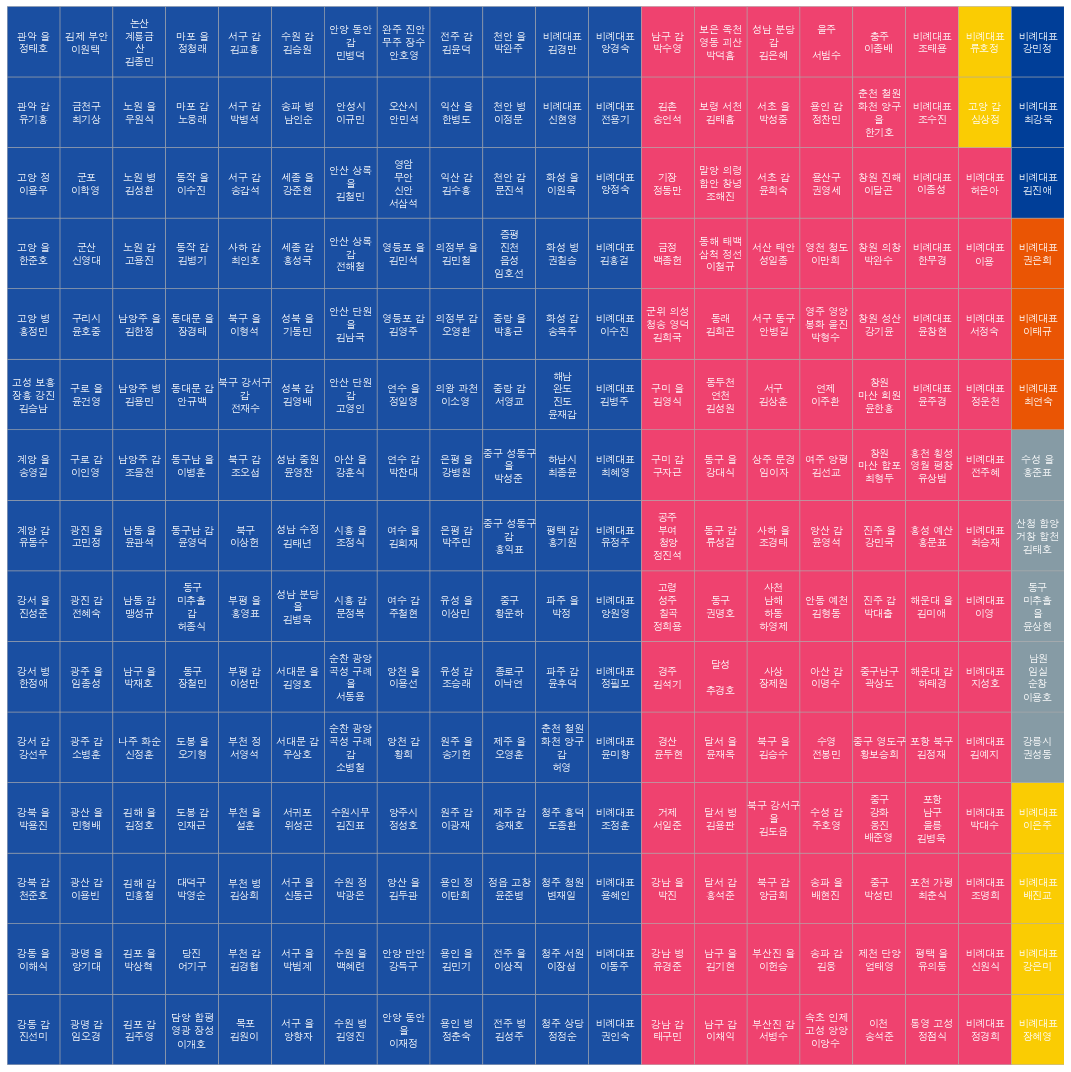

In [359]:
National_Assembly_21th_MAP = National_Assembly_21th.pivot_table(index='Y', columns='X', values='order')

plt.figure(figsize=(15, 15))

plt.pcolor(National_Assembly_21th_MAP, cmap=cm_order_party, edgecolor='#aaaaaa', linewidth=0.5)

for idx, row in National_Assembly_21th.iterrows():
    name = row['표시이름']
    plt.annotate(name, (row['X']+0.5, row['Y']+0.5), weight='bold',
                 fontsize=10, ha='center', va='center', color='white')
plt.axis('off')
plt.tight_layout()
plt.savefig('../21대 국회 의원(정당).png')
plt.show()

In [360]:
# 성향 순서대로 정렬

order = {
    '더불어민주당':'진보',
    '더불어시민당':'진보',
    '미래통합당':'보수',
    '미래한국당':'보수',
    '정의당':'진보',
    '무소속': '보수',
    '국민의당':'중도',
    '열린민주당':'진보'
}

for party in list(order.keys()):
    National_Assembly_21th.loc[National_Assembly_21th['소속정당'] == party, '성향'] = order[party]

tendency = {
    '진보':0,
    '중도':1,
    '보수':2,
}


color_order_tendency = {
    '진보':"#4972b8",
    '보수':"#7b7b7b",
    '중도':"#b84949",
}
cm_order_tendency = LinearSegmentedColormap.from_list('election', list(color_order_tendency.values()), N=3)


for ten in list(tendency.keys()):
    National_Assembly_21th.loc[National_Assembly_21th['성향'] == ten, 'order'] = tendency[ten]

National_Assembly_21th.loc[National_Assembly_21th['당선자명'] == '이용호', '성향'] = '진보'
National_Assembly_21th.loc[National_Assembly_21th['당선자명'] == '이용호', 'order'] = 0

National_Assembly_21th = National_Assembly_21th.sort_values(['order', '표기이름']).reset_index(drop=True)

X = []
Y = []

for x in range(20):
    for y in range(15):
        X.append(x)
        Y.append(y)
        
National_Assembly_21th['X'] = X
National_Assembly_21th['Y'] = Y
National_Assembly_21th['표시이름'] = National_Assembly_21th['표기이름'] + '\n' +  National_Assembly_21th['당선자명']
National_Assembly_21th.head()

,소속정당,당선자명,표기이름,order,X,Y,표시이름,성향
0,더불어민주당,진선미,강동 갑,0.0,0,0,강동 갑\n진선미,진보
1,더불어민주당,이해식,강동 을,0.0,0,1,강동 을\n이해식,진보
2,더불어민주당,천준호,강북 갑,0.0,0,2,강북 갑\n천준호,진보
3,더불어민주당,박용진,강북 을,0.0,0,3,강북 을\n박용진,진보
4,더불어민주당,강선우,강서 갑,0.0,0,4,강서 갑\n강선우,진보


In [361]:
National_Assembly_21th.groupby('성향')['당선자명'].agg(['count'])

,count
성향,
보수,107
중도,3
진보,190


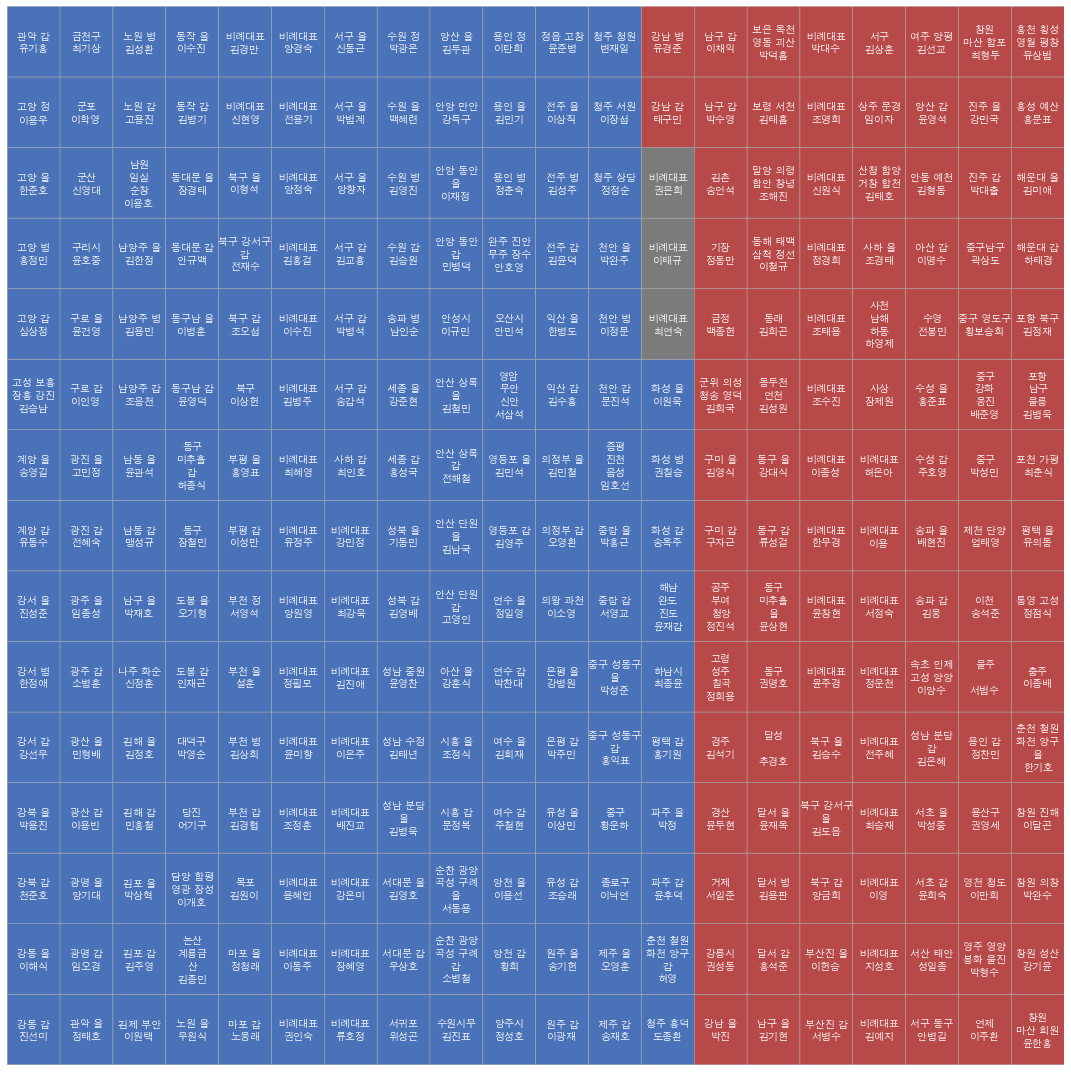

In [362]:
National_Assembly_21th_MAP = National_Assembly_21th.pivot_table(index='Y', columns='X', values='order')

plt.figure(figsize=(15, 15))

plt.pcolor(National_Assembly_21th_MAP, cmap=cm_order_tendency, edgecolor='#aaaaaa', linewidth=0.5)

for idx, row in National_Assembly_21th.iterrows():
    name = row['표시이름']
    plt.annotate(name, (row['X']+0.5, row['Y']+0.5), weight='bold',
                 fontsize=10, ha='center', va='center', color='white')
plt.axis('off')
plt.tight_layout()
plt.savefig('../21대 국회 의원(성향).png')
plt.show()